## `Setup Init`

In [10]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import lines, patches

from flexitext import flexitext

import warnings
warnings.filterwarnings('ignore')

## `Analyze Data`

Pertama, import data ke dalam pandas dataframe

In [11]:
df = pd.read_csv('../data/processed/cleaned_data.csv', engine='pyarrow')
df.sample(5)

,,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,...,member_casual,distance,duration,start_day,ended_day,start_time,ended_time,class_duration,class_distance,weekday
94592,98533,6944506824B062E8,classic_bike,2023-03-27 15:49:55,2023-03-27 15:59:51,Wabash Ave & Wacker Pl,TA1307000131,Dearborn St & Monroe St,TA1305000006,41.886875,...,member,680.0,9.93,Monday,Monday,15:49:55,15:59:51,> 7.5 minute,0-750 m,weekend
121082,125962,5B4A016C532F92E7,electric_bike,2023-03-02 12:27:01,2023-03-02 12:46:23,Michigan Ave & Washington St,13001,Hermitage Ave & Polk St,13080,41.883845,...,member,3980.0,19.37,Thursday,Thursday,12:27:01,12:46:23,> 7.5 minute,> 2100 m,weekday
491105,510012,1BA0D4380A4DD936,electric_bike,2023-03-08 10:17:55,2023-03-08 10:24:52,Damen Ave & Pierce Ave,TA1305000041,Noble St & Milwaukee Ave,13290,41.909395,...,member,1800.0,6.95,Wednesday,Wednesday,10:17:55,10:24:52,0-7.5 minute,750-2100 m,weekday
178723,185411,08189DBBE5073591,electric_bike,2023-03-04 13:06:26,2023-03-04 13:12:42,Halsted St & Polk St,TA1307000121,Loomis St & Lexington St,13332,41.871810,...,member,1220.0,6.27,Saturday,Saturday,13:06:26,13:12:42,0-7.5 minute,750-2100 m,weekend
465093,482565,FB060567893D616C,classic_bike,2023-01-14 21:01:59,2023-01-14 21:07:55,State St & 35th St,TA1307000129,Rhodes Ave & 32nd St,13215,41.831036,...,member,1240.0,5.93,Saturday,Saturday,21:01:59,21:07:55,0-7.5 minute,750-2100 m,weekend


Kemudian, melakukan analisis terhadap masing-masing atribut pada data:

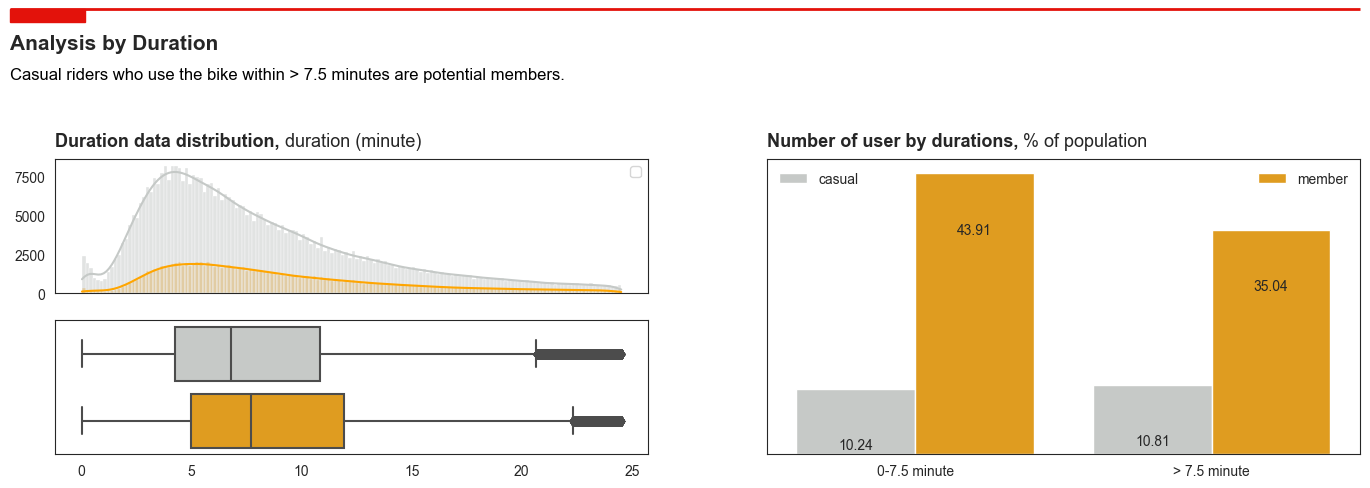

In [12]:
# set the data 
Q1_duration = df['duration'].quantile(0.25)
Q3_duration = df['duration'].quantile(0.75)
IQR_duration = Q3_duration - Q1_duration
df_dur = df.query('(@Q1_duration - 1.5 * @IQR_duration) <= duration <= (@Q3_duration + 1.5 * @IQR_duration)')

# figure size
fig =  plt.figure(figsize=(15, 5))

# background color
sns.set_style("white")

# axes configuration
gs = gridspec.GridSpec(2, 2)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[1, 0])
ax3 = plt.subplot(gs[:, 1])

# make room below on top and bottom
fig.subplots_adjust(top=0.7, left=0.03)

# add line and rectangle on top.
fig.add_artist(lines.Line2D([0, 0.9], [1, 1], lw=2, color='#E3120B', solid_capstyle="butt"))
fig.add_artist(patches.Rectangle((0, 0.975), 0.05, 0.025, color='#E3120B'))

# add title
fig.text(
    0, 0.92, "Analysis by Duration", 
    fontsize=15,
    fontweight="bold", 
)

# add subtitle
fig.text(
    0, 0.86, 
    "Casual riders who use the bike within > 7.5 minutes are potential members.", 
    fontsize=12, 
    color='black'
)

# add title for histogram plot
text = "<size:13><weight:bold>Duration data distribution,</> duration (minute)</>"
flexitext(0, 1.2, text, va="top", ax=ax1)

# add title for bar plot
text = "<size:13><weight:bold>Number of user by durations,</> % of population</>"
flexitext(1.2, 1.2, text, va="top", ax=ax1)

# historgram plot
g1 = sns.histplot(
    data=df_dur, 
    x="duration", 
    ax=ax1,
    hue='member_casual', 
    kde=True, 
    palette=['#C5C9C7', '#FFA500'],
)
g1.set(xlabel=None, ylabel=None, xticklabels=[])
g1.legend([])

# boxplot
g2 = sns.boxplot(
    data=df_dur, 
    x="duration", 
    y='member_casual',
    ax=ax2, 
    palette=['#C5C9C7', '#FFA500'],
)
g2.set(xlabel=None, ylabel=None, yticklabels=[])
g2.tick_params(left=False)

# barplot
df_bar = pd.pivot_table(
    data=df_dur,
    index=['member_casual', 'class_duration'],
    values='ride_id',
    aggfunc='count').reset_index()

df_bar['%'] = (df_bar['ride_id']/df_bar['ride_id'].sum())*100

g3 = sns.barplot(
    data=df_bar, 
    x="class_duration", 
    y="%", 
    ax=ax3,
    hue='member_casual',
    palette=['#C5C9C7', '#FFA500'],
)
g3.set(ylabel=None, xlabel=None, yticklabels=[])
g3.tick_params(left=False)
g3.legend(loc='upper right', mode='expand', ncol=2, frameon=False)

# annotation
for bar in g3.patches:
    g3.annotate(
        format(bar.get_height(), '.2f'), (bar.get_x() + bar.get_width() / 2, bar.get_height() + 2), 
        ha='center', 
        va='center',
        size=10, 
        xytext=(0, -50),
        textcoords='offset points')

# show the plot
plt.show()

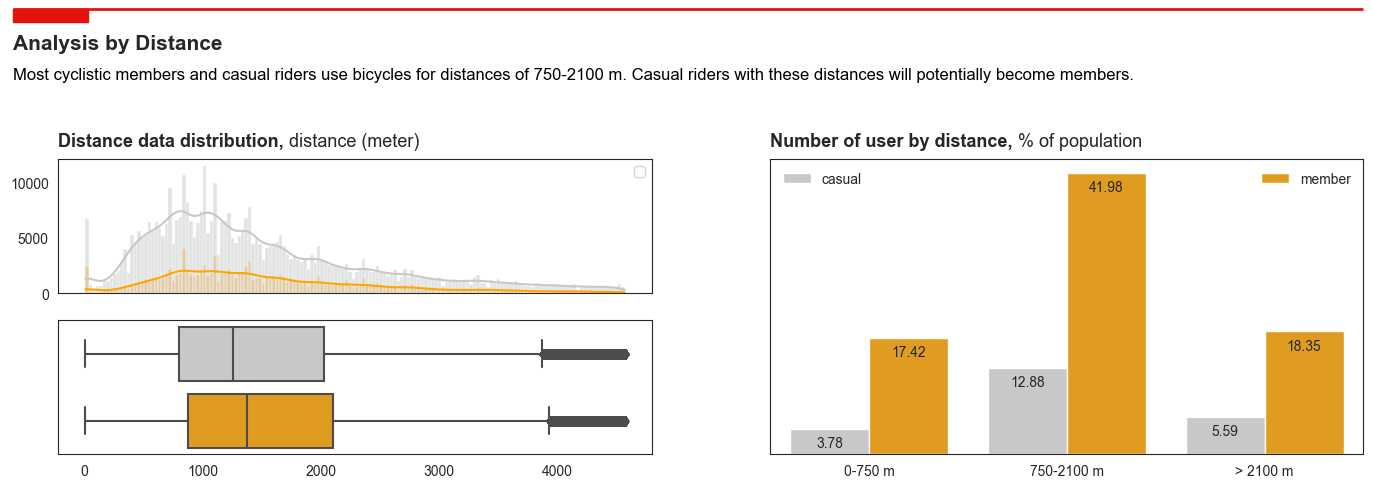

In [13]:
# set the data
Q1_distance = df['distance'].quantile(0.25)
Q3_distance = df['distance'].quantile(0.75)
IQR_distance = Q3_distance - Q1_distance

df_dist = df.query('(@Q1_distance - 1.5 * @IQR_distance) <= distance <= (@Q3_distance + 1.5 * @IQR_distance)')

# figure size
fig = plt.figure(figsize=(15, 5))

# backgorund color
sns.set_style("white")

# axes configuration
gs = gridspec.GridSpec(2, 2)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[1, 0])
ax3 = plt.subplot(gs[:, 1])

# make room below on top and bottom
fig.subplots_adjust(top=0.7, left=0.03)

# add line and rectangle on top.
fig.add_artist(lines.Line2D([0, 0.9], [1, 1], lw=2, color='#E3120B', solid_capstyle="butt"))
fig.add_artist(patches.Rectangle((0, 0.975), 0.05, 0.025, color='#E3120B'))

# add title
fig.text(
    0, 0.92, "Analysis by Distance", 
    fontsize=15,
    fontweight="bold", 
)

# add subtitle
fig.text(
    0, 0.86, 
    "Most cyclistic members and casual riders use bicycles for distances of 750-2100 m. Casual riders with these distances will potentially become members.", 
    fontsize=12, 
    color='black'
)

# add title for histogram plot
text = "<size:13><weight:bold>Distance data distribution,</> distance (meter)</>"
flexitext(0, 1.2, text, va="top", ax=ax1)

# add title for bar plot
text = "<size:13><weight:bold>Number of user by distance,</> % of population</>"
flexitext(1.2, 1.2, text, va="top", ax=ax1)

# historgram plot
g1 = sns.histplot(
    data=df_dist, 
    x="distance", 
    ax=ax1,
    hue='member_casual', 
    kde=True, 
    palette=['#C5C9C7', '#FFA500'],
)
g1.set(xlabel=None, ylabel=None, xticklabels=[])
g1.legend([])

# boxplot
g2 = sns.boxplot(
    data=df_dist, 
    x="distance", 
    y='member_casual',
    ax=ax2, 
    palette=['#C5C9C7', '#FFA500'],
)
g2.set(xlabel=None, ylabel=None, yticklabels=[])
g2.tick_params(left=False)

# barplot
df_bar = pd.pivot_table(
    data=df_dist,
    index=['member_casual', 'class_distance'],
    values='ride_id',
    aggfunc='count').reset_index()

df_bar['%'] = (df_bar['ride_id']/df_bar['ride_id'].sum()) * 100

g3 = sns.barplot(
    data=df_bar, 
    x="class_distance", 
    y="%", 
    ax=ax3,
    order=['0-750 m', '750-2100 m', '> 2100 m'],
    hue='member_casual',
    palette=['#C5C9C7', '#FFA500'],
)
g3.set(ylabel=None, xlabel=None, yticklabels=[])
g3.tick_params(left=False)
g3.legend(loc='upper right', mode='expand', ncol=2, frameon=False)

# annotation
for bar in g3.patches:
    g3.annotate(
        format(bar.get_height(), '.2f'), (bar.get_x() + bar.get_width() / 2, bar.get_height() + 2), 
        ha='center', 
        va='center',
        size=10, 
        xytext=(0, -20),
        textcoords='offset points')

# show the plot
plt.show()

In [14]:
from plotly.offline import iplot

# set the data
df3 = df.query('(@Q1_duration - 1.5 * @IQR_duration) <= duration <= (@Q3_duration + 1.5 * @IQR_duration)')
df3 = df3.query('(@Q1_distance - 1.5 * @IQR_distance) <= distance <= (@Q3_distance + 1.5 * @IQR_distance)')

df3 = df3.groupby(['class_duration', 'class_distance', 'member_casual'])\
    .agg({'member_casual': 'count'}).rename(columns={'member_casual':'count'}).reset_index()

def convert_color(x):
    if x != 'casual':
        return '#FFA500'
    else:
        return '#C5C9C7'
        
df3 = df3.assign(color=df3.member_casual.apply(lambda x: convert_color(x)))

# build sankey diagram
cat_cols = ['class_duration', 'class_distance']

colorPalette = ['#306998','#FFE873']
labelList = []
colorNumList = []
for catCol in cat_cols:
    labelListTemp =  list(set(df[catCol].values))
    colorNumList.append(len(labelListTemp))
    labelList = labelList + labelListTemp
    
labelList = list(dict.fromkeys(labelList))

colorList = []
for idx, colorNum in enumerate(colorNumList):
    colorList = colorList + [colorPalette[idx]]*colorNum
    
for i in range(len(cat_cols)-1):
    if i==0:
        sourceTargetDf = df3[[cat_cols[i], cat_cols[i+1], 'count', 'color']]
        sourceTargetDf.columns = ['source', 'target', 'count', 'colors']
    else:
        tempDf = df3[[cat_cols[i], cat_cols[i+1], 'count', 'color']]
        tempDf.columns = ['source', 'target', 'count', 'colors']
        sourceTargetDf = pd.concat([sourceTargetDf, tempDf])
    sourceTargetDf = sourceTargetDf.groupby(['source', 'target', 'colors']).agg({'count':'sum'}).reset_index()
    
sourceTargetDf['sourceID'] = sourceTargetDf['source'].apply(lambda x: labelList.index(x))
sourceTargetDf['targetID'] = sourceTargetDf['target'].apply(lambda x: labelList.index(x))

data = dict(
    type='sankey',
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(
        color = "black",
        width = 0.5
      ),
      label = labelList,
      color = colorList,
    ),
    link = dict(
      source = sourceTargetDf['sourceID'],
      target = sourceTargetDf['targetID'],
      value = sourceTargetDf['count'],
      color = sourceTargetDf['colors']
      
    )
  )

def format_title(title, subtitle=None, subtitle_font_size=15):
    title = f'<b>{title}</b>'
    if not subtitle:
        return title
    subtitle = f'<span style="font-size: {subtitle_font_size}px;">{subtitle}</span>'
    return f'{title}<br>{subtitle}'

layout =  dict(
        title = format_title(
            title='Analysis by Duration & Distance',
            subtitle='Casual rider (grey) with duration 0-7.5 minute and distance 750-2100 m, or with duration >7.5 minute and distance 750-2100 m will be a good candidate to be member.'),
        font_family='DejaVu Sans',
        font_color='black',
        legend=dict(
            yanchor="top",
            y=0.99,
            xanchor="left",
            x=0.01)
    )
    
fig = dict(data=[data], layout=layout)
iplot(fig)


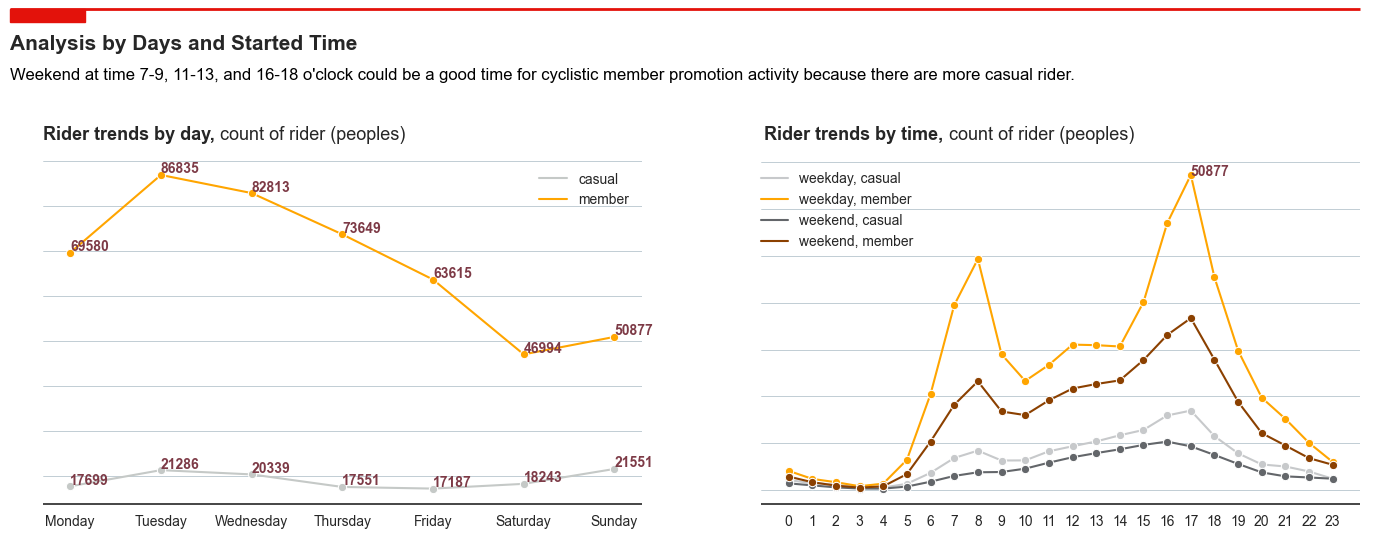

In [15]:
# set the data for first plot
day_dict = {'Monday':1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7}

df4 = pd.DataFrame(df.groupby(['start_day', 'member_casual'])['ride_id'].agg('count'))\
    .reset_index().sort_values('start_day', key = lambda x : x.apply (lambda x : day_dict[x]))

# set the data for second plot 
df5 = pd.DataFrame(df.groupby(by=[df.start_time.map(lambda x : x.hour), 'weekday', 'member_casual']).ride_id.count()).reset_index()

# initialize plot
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# make room below on top and bottom
fig.subplots_adjust(top=0.8, left=0.022)

# add line and rectangle on top.
fig.add_artist(lines.Line2D([0, 0.9], [1.1, 1.1], lw=2, color='#E3120B', solid_capstyle="butt"))
fig.add_artist(patches.Rectangle((0, 1.075), 0.05, 0.025, color='#E3120B'))

# add title
fig.text(
    0, 1.02, "Analysis by Days and Started Time", 
    fontsize=15,
    fontweight="bold", 
)

# add subtitle
fig.text(
    0, .960, 
    "Weekend at time 7-9, 11-13, and 16-18 o'clock could be a good time for cyclistic member promotion activity because there are more casual rider.", 
    fontsize=12, 
    color='black'
)

# add title for first line plot
text = "<size:13><weight:bold>Rider trends by day,</> count of rider (peoples)</>"
flexitext(0, 1.1, text, va="top", ax=ax[0])

# add title for second line plot
text = "<size:13><weight:bold>Rider trends by time,</> count of rider (peoples)</>"
flexitext(0.005, 1.1, text, va="top", ax=ax[1])

# background color
sns.set_style("white")

# build first line plot
sns.lineplot(
    data=df4, 
    x='start_day', 
    y='ride_id', 
    hue='member_casual', 
    marker="o",
    palette=['#C5C9C7', '#FFA500'], 
    ax=ax[0], legend=True
).set(xlabel=None, ylabel=None)

# build second line plot
hue = df5[['weekday', 'member_casual']].apply(lambda row: f"{row.weekday}, {row.member_casual}", axis=1)
sns.lineplot(
    data=df5, 
    x='start_time', 
    y='ride_id', 
    hue=hue, 
    errorbar=None,
    marker="o",
    palette=["#C7C9CB", '#FFA500', '#63666A', '#8B4000'], 
    legend=True).set(xlabel=None, ylabel=None)

# add value label on mark point         
for x, y in zip(df4['start_day'], df4['ride_id']):
    ax[0].text(
        x=x, 
        y=y+500,
        s='{:.0f}'.format(y), 
        color="#7d3a46", 
        weight='bold'
    )

ax[1].text(
    x=17, 
    y=df5.ride_id.max(),
    s='{:.0f}'.format(y), 
    color="#7d3a46", 
    weight='bold'
)

# customize y-axis ticks
ax[0].yaxis.set_tick_params(labelleft=False, length=0)
ax[1].yaxis.set_tick_params(labelleft=False, length=0)

# customize x-axis ticks
ax[1].xaxis.set_ticks(list(df5.start_time.unique()))

# make gridlines be below most artists
ax[0].set_axisbelow(True)
ax[1].set_axisbelow(True)

# add grid lines
ax[0].grid(axis = "y", color="#A8BAC4", lw=0.5)
ax[1].grid(axis = "y", color="#A8BAC4", lw=0.5)

# remove all spines but the one in the bottom
ax[0].spines["right"].set_visible(False)
ax[0].spines["top"].set_visible(False)
ax[0].spines["left"].set_visible(False)
ax[1].spines["right"].set_visible(False)
ax[1].spines["top"].set_visible(False)
ax[1].spines["left"].set_visible(False)

# customize bottom spine
ax[0].spines["bottom"].set_lw(1.2)
ax[0].spines["bottom"].set_capstyle("butt")
ax[1].spines["bottom"].set_lw(1.2)
ax[1].spines["bottom"].set_capstyle("butt")

# add legend
ax[0].legend(
    loc='upper right',
    frameon=False,
    ncol=1, 
    prop={'size': 10})

ax[1].legend(
    loc='upper left',
    frameon=False,
    bbox_to_anchor=(0., 0.86, 1., .102), 
    mode='expand', 
    ncol=1, 
    borderaxespad=-.46,
    prop={'size': 10})

# show
plt.show()

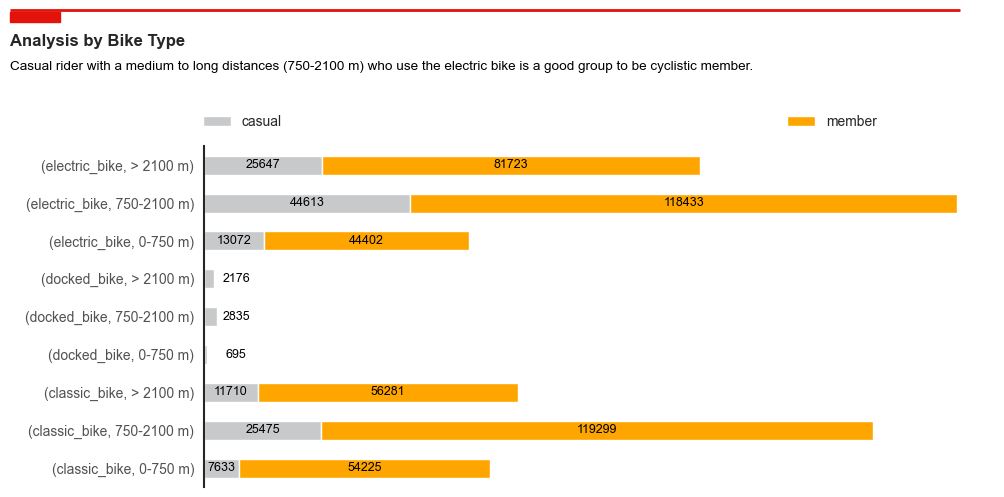

In [16]:
# set the data
df6 = df.groupby(['rideable_type', 'class_distance', 'member_casual']).size()
df6 = df6.unstack()

# initialize plot
fig, ax = plt.subplots()

# adjust the subplot so that the title would fit
plt.subplots_adjust(top=0.7)

# add line and rectangle on top.
fig.add_artist(lines.Line2D([0, 0.95], [1.23, 1.23], lw=2, color='#E3120B', solid_capstyle="butt"))
fig.add_artist(patches.Rectangle((0, 1.2), 0.05, 0.025, color='#E3120B'))

# add title
fig.text(
    0, 1.14, "Analysis by Bike Type", 
    fontsize=12,
    fontweight="bold", 
)

# add subtitle
fig.text(
    0, 1.08, 
    "Casual rider with a medium to long distances (750-2100 m) who use the electric bike is a good group to be cyclistic member.", 
    fontsize=9.7, 
    color='black'
)

# build bar chart
ax = df6.plot.barh(
    align='center', 
    stacked=True, 
    figsize=(10, 4), 
    color=["#C7C9CB", '#FFA500'], 
    ax=ax, 
)
    
# add annotation value on the bar
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 

    if width > 3000:
        X = x+width/2
        Y = y+height/2

    elif width != 0.0:
        X = x+7000
        Y = y+height/2
    
    else:
        continue

    ax.text(
        X, Y, 
        '{:.0f}'.format(width), 
        horizontalalignment='center', 
        verticalalignment='center',
        color='black',
        fontsize=9)

# add legend
legend = plt.legend(
    loc='center',
    frameon=False,
    mode="expand",
    bbox_to_anchor=(0., 1.02, .85, .102), 
    ncol=4, 
    borderaxespad=-.46,
    prop={'size': 10})
    
# set whether axis ticks and gridlines are above or below most artists.
ax.set_axisbelow(True)

# customize axes spine
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_lw(1.5)

# customize ticks and label
plt.yticks(color='#525252')
plt.ylabel(ylabel=None)
plt.xticks(ticks=[])
plt.xlabel(xlabel=None)

# show
plt.tight_layout()
plt.show()

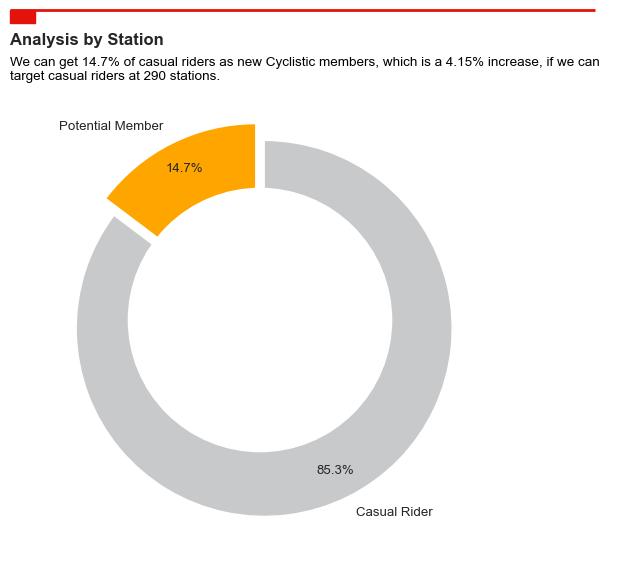

In [17]:
# initialize plot
fig, ax = plt.subplots(figsize=(5, 5))

# adjust the subplot so that the title would fit
plt.subplots_adjust(top=0.9)

# add line and rectangle on top.
fig.add_artist(lines.Line2D([0, 1.17], [1.12, 1.12], lw=2, color='#E3120B', solid_capstyle="butt"))
fig.add_artist(patches.Rectangle((0, 1.095), 0.05, 0.025, color='#E3120B'))

# add title
fig.text(
    0, 1.05, "Analysis by Station", 
    fontsize=12,
    fontweight="bold", 
)

# add subtitle
fig.text(
    0, 0.98, 
    "We can get 14.7% of casual riders as new Cyclistic members, which is a 4.15% increase, if we can \
        \ntarget casual riders at 290 stations.",
    fontsize=9.7, 
    color='black'
)

# create pie chart
plt.pie([19712, 114144], 
        colors=['#FFA500', "#C7C9CB"],
        labels=['Potential Member', 'Casual Rider'], 
        autopct='%1.1f%%', 
        startangle=90, 
        pctdistance=0.85, 
        explode=(0.05, 0.05),
        textprops = {"fontsize": 9.5},
)

# create a circle at the center of the plot
fig = plt.gcf()
fig.gca().add_artist(plt.Circle((0, 0), 0.7, fc='white'))

# show
plt.tight_layout()
plt.show()

In [18]:
import folium
from folium.plugins import HeatMap

df_station = df.query("member_casual == 'casual'")

df_station = df_station.groupby(
    [pd.Grouper(key='started_at', freq='D'), pd.Grouper(key='start_station_name'), pd.Grouper(key='end_station_name')]
    ).agg('count').reset_index()

df_station = pd.pivot_table(
    data=df_station[['start_station_name', 'end_station_name', 'ride_id']],
    index=['start_station_name', 'end_station_name'],
    aggfunc='mean'
    ).rename(columns={'ride_id': 'avg'}).nlargest(500, 'avg')

for id in df_station.index:
    df_station.loc[id, 'count'] = df.query("start_station_name == @id[0] and end_station_name == @id[1]").shape[0]
    df_station.loc[id, ['lat', 'lng']] = df.query("start_station_name == @id[0]")[['start_lat', 'start_lng']].sample(1).values

maps = folium.Map(location=[41.881832, -87.623177], zoom_start=14, width=500, height=650)

mouse_position = folium.plugins.MousePosition(
    position='topright',
    separator=' Long: ',
    empty_string='NaN',
    lng_first=False,
    num_digits=20,
    prefix='Lat:',
)

maps.add_child(mouse_position)

HeatMap(
    data=df_station.reset_index().melt(id_vars=['lat', 'lng'], value_vars=['start_station_name', 'end_station_name'])[['lat', 'lng']],
    min_opacity=0.2, 
    blur=20).add_to(folium.FeatureGroup(name='Heat Map of Start Station').add_to(maps))

folium.Rectangle(bounds=[(41.895, -87.615), (41.889, -87.608)], color='#ff7800', fill_color='#ffff00', fill=False, fill_opacity=0.5).add_to(maps)
folium.Rectangle(bounds=[(41.868, -87.610), (41.863, -87.604)], color='#ff7800', fill_color='#ffff00', fill=False, fill_opacity=0.5).add_to(maps)
folium.Rectangle(bounds=[(41.887, -87.627), (41.878, -87.621)], color='#ff7800', fill_color='#ffff00', fill=False, fill_opacity=0.5).add_to(maps)
folium.Rectangle(bounds=[(41.869, -87.618), (41.864, -87.612)], color='#ff7800', fill_color='#ffff00', fill=False, fill_opacity=0.5).add_to(maps)

folium.LayerControl().add_to(maps)

maps

## `Recommendation`

* `Station` : To increase the number of cyclistic members by the end of this quarter (Q1), there are 290 most-used stations in marked zone. If we could convert all of the cyclistic members who usually use the bike for commuting at those stations, there will be a 4.15% increase in the amount of cyclistic members.

* `Time` : Run promotion program when people commute in the morning (7:00 - 9:00 A.M), in lunchtime (11:00 AM - 1:00 PM), or in the afternoon (4:00 - 6:00 PM) because at this time there is much casual rider in Chicago.

* `Bike Type` : Never target docked bike user, just target casual riders who use electric bikes or classic bikes. First target the electric sic bike users, then target the classic bike users.

* `Duration and Distance` : Target the casual rider who use the bike with a duration of 0-7.5 minute or > 7.5 minute for distance 750-2100 m first, then the second target is the group with a duration > 7.5 minutes and distance of > 2100 m.